In [ ]:
pip install neuron

     |████████████████████████████████| 12.6 MB 7.9 MB/s 


In [ ]:
from neuron import h
#more information can be found at: https://neuron.yale.edu/neuron/docs/scripting-neuron-basics

### Create Soma and Set Soma Properties

In [ ]:
soma = h.Section(name='soma')
soma.diam = 18.8 #um
soma.L = 18.8 #um
soma.Ra = 123 # ohm-cm
soma.cm = 1 #uF/cm2
#The following command inserts the Hodgkin-Huxley Na and K channels, after which //the channel variables gnabar_hh, etc. are defined......and so can be accessed.

soma.insert('hh')
soma.gnabar_hh = 0.12 #S/cm2
soma.gkbar_hh = 0.036 #S/cm2
soma.gl_hh = 0.0003 # S/cm2
soma.ena = 55 #mV
soma.ek = -77 #mv
soma.el_hh = -54.3

#creating current clamp in the middle of the soma
iclamp = h.IClamp(soma(0.5))
iclamp.delay = 100 # ms
iclamp.dur = 100 # ms
iclamp.amp = 0.2 #nA

### Create Current Clamp and Recording Variables

In [ ]:
from neuron.units import ms, mV
h.load_file('stdrun.hoc')
#recording variables
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t) 

h.load_file('stdrun.hoc')
h.finitialize(-65 * mV)## vrest
h.continuerun(300 * ms)## simulation time

0.0

## Plot the Results

Text(0, 0.5, 'v (mV)')

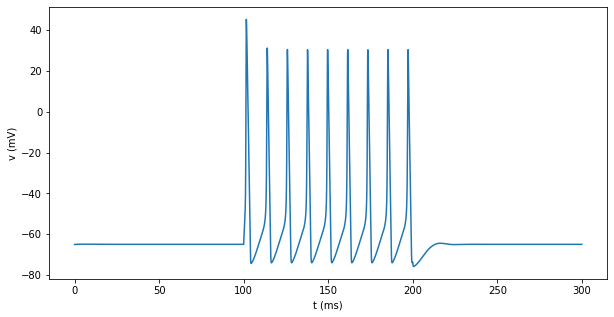

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(t, v)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')